# Linear Regression by Gradient Descent

The simplest machine learning algorithm is linear regression. We will code up linear regression from scratch with a twist: We will use gradient descent, which is also how neural networks learn.

Most of this lesson is pretty much stolen from Jeremy Howard's fast.ai [lesson zero](https://www.youtube.com/watch?v=ACU-T9L4_lI), and adjusted from [Stephan Rasp's github](https://github.com/raspstephan/MPI-ML-Tutorial/blob/master/linear-regression.ipynb).

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)

## Linear regression from scratch

We will learn the parameters a and b of a line.

In [3]:
def lin(a, b, x): return a*x + b

Chose the true parameters we want to learn.

In [4]:
a = 2
b = 4
# n =100

And create some data points x and y which lie on the line

In [5]:
n = 50
x = np.random.rand(n)
y = lin(a, b, x) + np.random.rand(n)/5

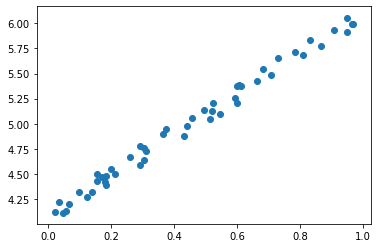

In [6]:
plt.scatter(x, y);

We would now like to learn a and b from our training data x and y. The first step is to define a function that is lower if our guess is closer to the truth. Here we chose the mean squared error.

In [7]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

Now we guess some random values for a and b.

In [8]:
a_guess = -3
b_guess = 6

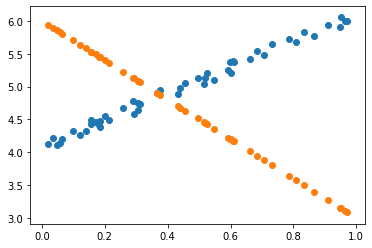

In [9]:
plt.scatter(x, y)
plt.scatter(x, lin(a_guess, b_guess, x));

In [10]:
mse(y, lin(a_guess, b_guess, x))

2.167026547419776

Written in terms of a and b, our **loss function** is:

$L = \frac{1}{n}\sum_n (y_t - (ax + b))^2$

In [11]:
def loss(y, a, b, x): return mse(y, lin(a, b, x))

To know how we have to change a and b to reduce the loss, we compute the derivatives or gradients.

$\frac{\partial L}{\partial a} = \frac{1}{n}\sum_n -2(y_t - (ax + b))x$

$\frac{\partial L}{\partial b} = \frac{1}{n}\sum_n -2(y_t - (ax + b))$

If we know those we can iteratively take little steps down the gradient to reduce the loss aka **gradient descent**. How big our steps are is determined by the **learning rate**.

In [12]:
lr = 0.9#Explode
lr = 0.03
a_guess = -3
b_guess = 6

In [13]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    l = loss(y, a_guess, b_guess, x)
    dLdb = -2 * (y - y_pred)
    dLda = dLdb * x
    a_guess -= lr * dLda.mean()
    b_guess -= lr * dLdb.mean()
    return l

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
line, = ax.plot(x, lin(a_guess, b_guess, x), c='firebrick')
ax.set_title('Loss = 0.00')
plt.close()

def animate(i):
    for i in range(20): l = update()
    ax.set_title('Loss = %.2f' % l)
    line.set_data(x, lin(a_guess, b_guess, x))
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=150, blit=True)

In [15]:
#You might have some difficulties running this cell without importing certain packages. 
HTML(anim.to_html5_video())

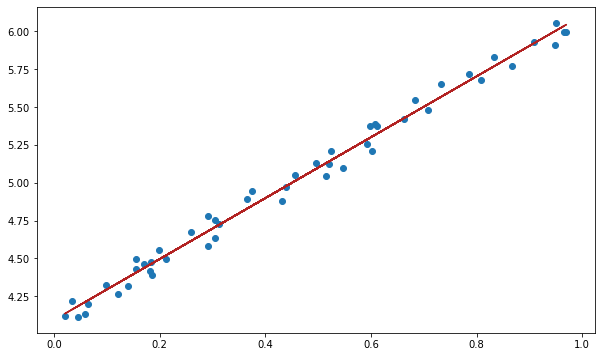

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
line, = ax.plot(x, lin(a_guess, b_guess, x), c='firebrick')



In deep learning, we never really use gradient decent as I presented it here, but a variant of gradient decent that is called Stochastic Gradient Decent (SGD) or mini-batch gradient decent. 
See video from Andrew Ng, that explains very nicely [SGD](https://www.coursera.org/lecture/machine-learning/stochastic-gradient-descent-DoRHJ)

## Do the same thing with Pytorch style

In [18]:
%matplotlib inline
from fastai.basics import *

In [19]:
n = 100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1) #Under score functions in pytorch means replace the value (update)
x[:5]

tensor([[-0.3515,  1.0000],
        [ 0.8703,  1.0000],
        [-0.0948,  1.0000],
        [-0.9561,  1.0000],
        [-0.6369,  1.0000]])

Tensor is a data structure which is a fundamental building block of PyTorch. Tensors are pretty much like numpy arrays, except that unlike numpy, tensors are designed to take advantage of parallel computation capabilities of a GPU
and more importantly for us - they can keep track of its gradients.

For further reading see [here](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)
    

In [22]:
a = tensor(3.,2); a

tensor([3., 2.])

In [23]:
y = x@a + torch.rand(n) # @ is a matrix product (similar to matmul)

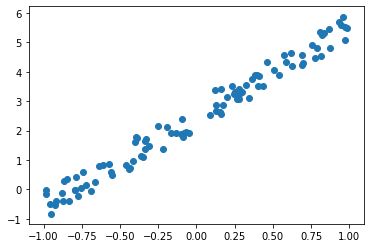

In [24]:
plt.scatter(x[:,0], y);

In [25]:
a = tensor(-1.,1)

If we could find a way to fit our guess for the coefficients 'a', we could use the exact same method for very complicated tasks (as image recognition). 

In [26]:
y_hat = x@a
mse(y_hat, y)

tensor(8.0515)

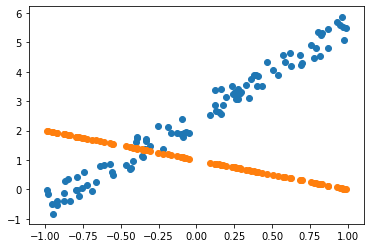

In [27]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [28]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

In [29]:
def update2():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: 
        print(loss)
        loss.backward() #calculate the gradient of a tensor! It is now stored at a.grad
    with torch.no_grad(): # To prevent tracking history (and using memory) (code block where we don't need to track the gradients but only modify the values of tensors)
        a.sub_(lr * a.grad) #Under score means inplace. lr is the learning rate. Good learning rate is a key part of Neural Networks. 
        a.grad.zero_() #We want to zero the gradient before we are re-evaluate it.

In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. This is convenient while training RNNs. So, the default action is to accumulate (i.e. sum) the gradients on every loss.backward() call.
Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Else the gradient would point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

explenations about how pytorch calculates the gradients can be found here (and in many other sources) - https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/

In [30]:
lr = 1e-1
for t in range(100): update2()

tensor(8.0515, grad_fn=<MeanBackward0>)
tensor(6.4940, grad_fn=<MeanBackward0>)
tensor(5.3188, grad_fn=<MeanBackward0>)
tensor(4.4125, grad_fn=<MeanBackward0>)
tensor(3.6992, grad_fn=<MeanBackward0>)
tensor(3.1277, grad_fn=<MeanBackward0>)
tensor(2.6625, grad_fn=<MeanBackward0>)
tensor(2.2789, grad_fn=<MeanBackward0>)
tensor(1.9593, grad_fn=<MeanBackward0>)
tensor(1.6906, grad_fn=<MeanBackward0>)


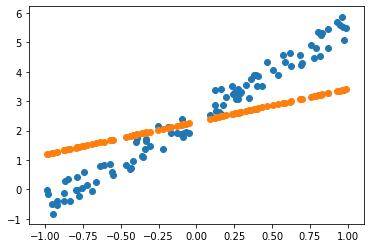

In [31]:
preds = x@a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],preds.detach().numpy());

In practice, we don't calculate the gradient decent based on all the samples from the training data but we use *mini-batches*. Namely, we take small subsample of our data, and doing gradient decent on a subsample of our data (which is called stochastic gradient decent, or mini-batch stochastic gradient decent). 

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

# End